# Canny Edge Detection

## Purpose
Apply Canny edge detection to color-thresholded lane masks to extract precise edge contours.

## Workflow
1. **Import functions** - Load pipeline functions from `src/pipeline.py`
2. **Load test frame** - Apply ROI and color thresholding
3. **Apply Canny** - Test edge detection on single frame
4. **Test on all frames** - Validate consistency across different conditions

## Goal
Find optimal Canny threshold values for clean, continuous edge detection.

## 1. Import Libraries and Pipeline Functions

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

# Import pipeline functions
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

# Reload module if already imported (for development)
if 'pipeline' in sys.modules:
    import importlib
    import pipeline
    importlib.reload(pipeline)
    from pipeline import apply_roi_mask, apply_color_threshold, apply_canny
else:
    from pipeline import apply_roi_mask, apply_color_threshold, apply_canny

print("✓ Libraries and pipeline functions imported")
print(f"✓ Pipeline imported from: {os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))}")

✓ Libraries and pipeline functions imported
✓ Pipeline imported from: c:\Users\nirdu\Documents\ComputerVision_Course\Project_lane_detection\lane-detection\src


## 2. Load Test Frame and Apply Preprocessing
Apply ROI mask and color thresholding to prepare for Canny

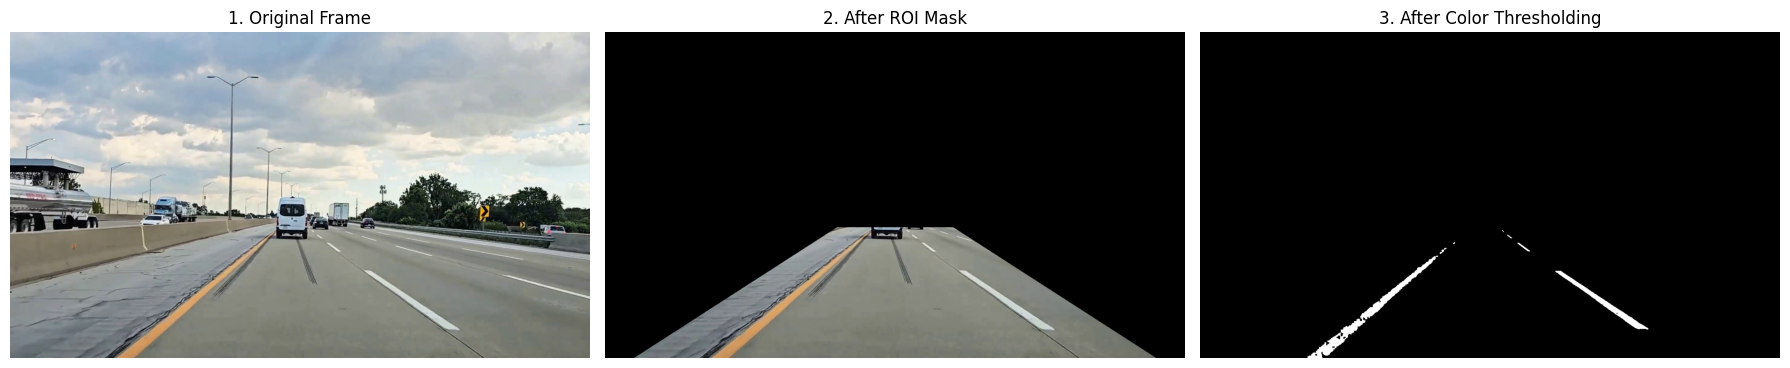

Frame loaded: frame_t109_f6540.png
Color mask shape: (1080, 1920)


In [16]:
# Load test frame
frames_dir = "../data/frames_sample"
frame_name = "frame_t109_f6540.png"
img = cv2.imread(os.path.join(frames_dir, frame_name))

# Apply preprocessing: ROI + Color Threshold
img_roi, roi_pts = apply_roi_mask(img)
color_mask = apply_color_threshold(img_roi)

# Display preprocessing results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("1. Original Frame")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(img_roi, cv2.COLOR_BGR2RGB))
axes[1].set_title("2. After ROI Mask")
axes[1].axis("off")

axes[2].imshow(color_mask, cmap="gray")
axes[2].set_title("3. After Color Thresholding")
axes[2].axis("off")

plt.tight_layout()
plt.show()

print(f"Frame loaded: {frame_name}")
print(f"Color mask shape: {color_mask.shape}")

## 3. Apply Canny Edge Detection
Test basic Canny edge detection on the color mask

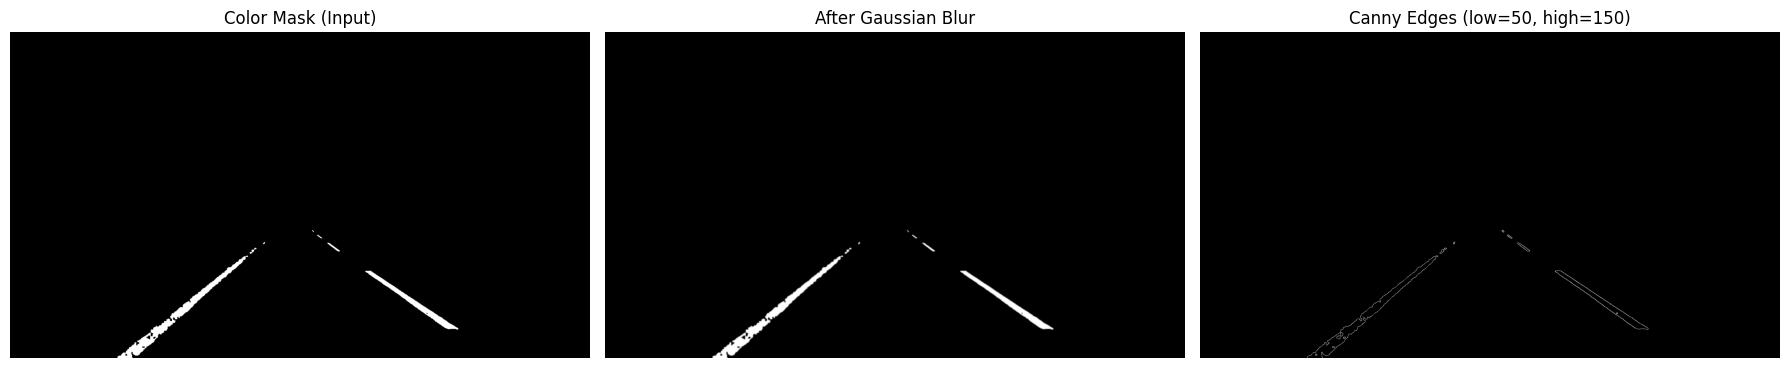

In [17]:
# Canny parameters
low_threshold = 50
high_threshold = 150

# Apply Canny edge detection using pipeline function
edges = apply_canny(color_mask, low_threshold, high_threshold)

# For comparison - show what apply_canny does internally
blurred = cv2.GaussianBlur(color_mask, (5, 5), 0)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].imshow(color_mask, cmap="gray")
axes[0].set_title("Color Mask (Input)")
axes[0].axis("off")

axes[1].imshow(blurred, cmap="gray")
axes[1].set_title("After Gaussian Blur")
axes[1].axis("off")

axes[2].imshow(edges, cmap="gray")
axes[2].set_title(f"Canny Edges (low={low_threshold}, high={high_threshold})")
axes[2].axis("off")

plt.tight_layout()
plt.show()

## 4. Compare Different Threshold Values
Test various threshold combinations to find optimal values

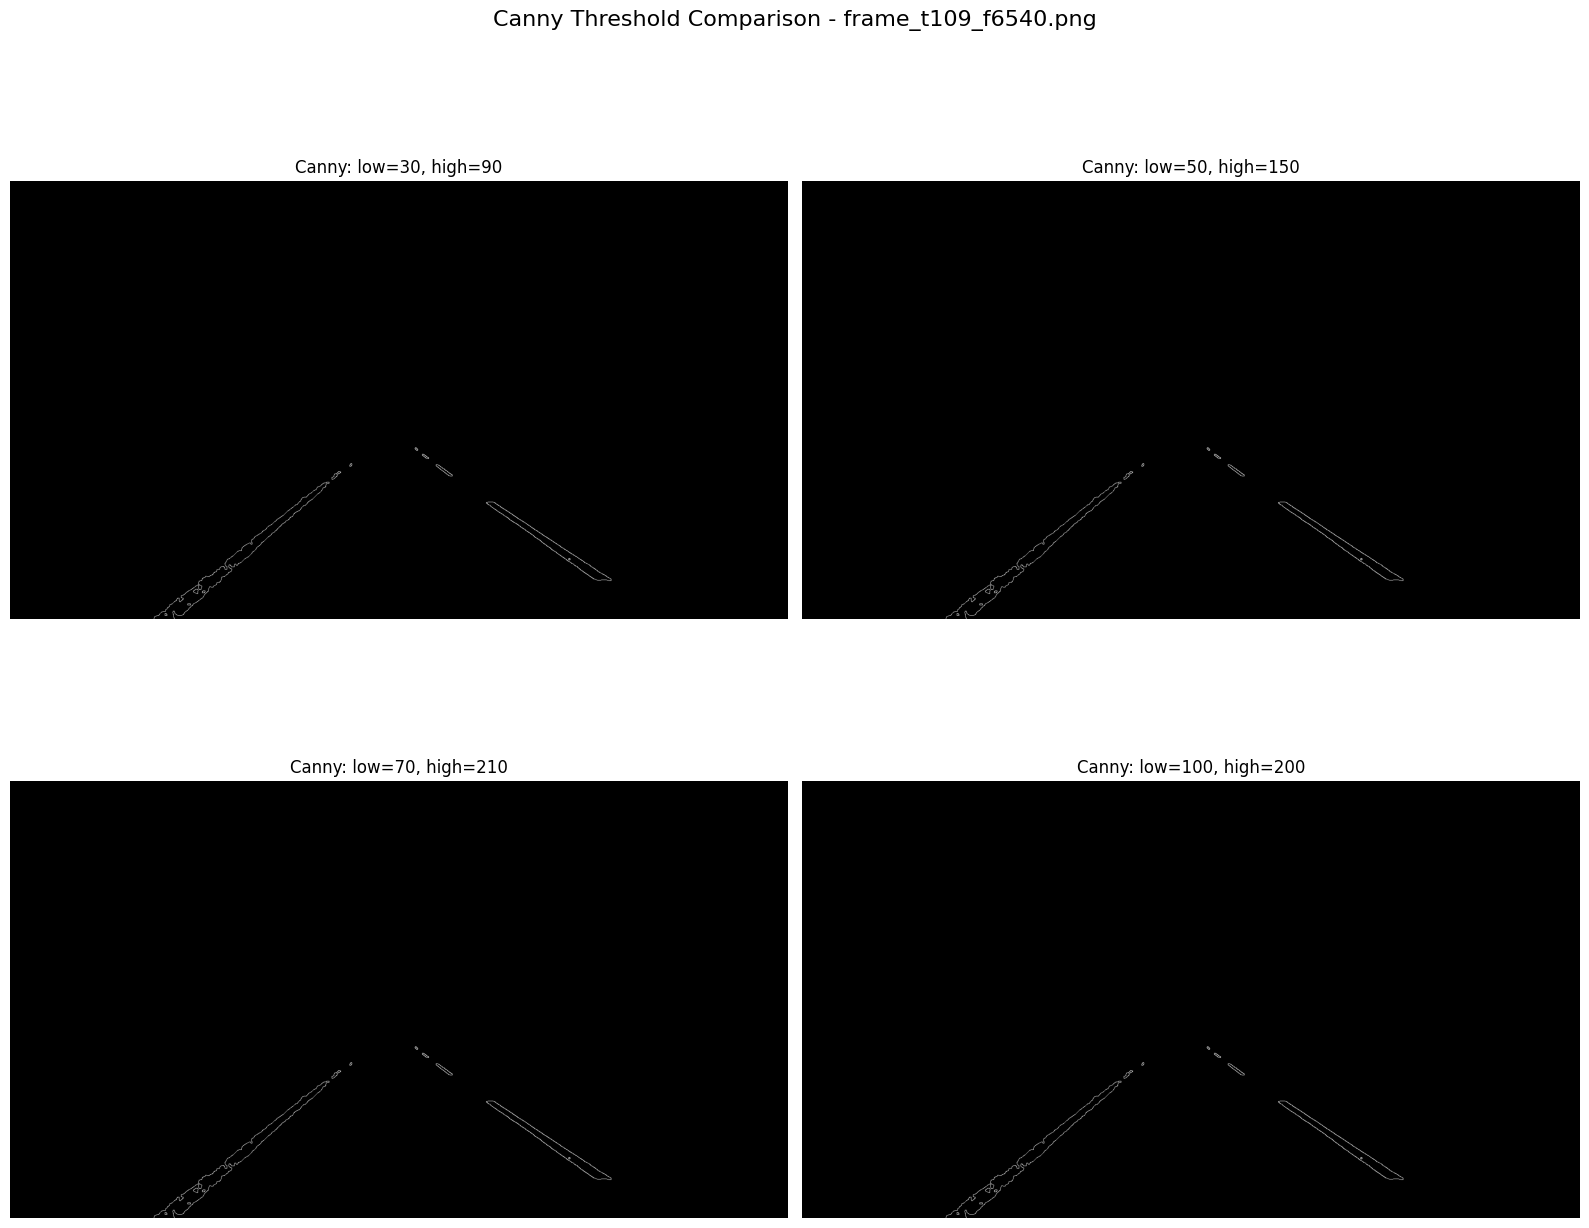

Threshold selection tips:
• Lower thresholds → More edges detected (including noise)
• Higher thresholds → Fewer edges, only strong ones
• Ratio high/low typically 2:1 or 3:1


In [18]:
# Test different threshold combinations
threshold_pairs = [
    (30, 90),    # Low sensitivity - fewer edges
    (50, 150),   # Medium (our default)
    (70, 210),   # Higher sensitivity
    (100, 200)   # Very high - more noise
]

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

for idx, (low, high) in enumerate(threshold_pairs):
    # Apply Canny with different thresholds
    edges = apply_canny(color_mask, low, high)
    
    # Display
    axes[idx].imshow(edges, cmap="gray")
    axes[idx].set_title(f"Canny: low={low}, high={high}", fontsize=12)
    axes[idx].axis("off")

plt.suptitle(f"Canny Threshold Comparison - {frame_name}", fontsize=16)
plt.tight_layout()
plt.show()

print("Threshold selection tips:")
print("• Lower thresholds → More edges detected (including noise)")
print("• Higher thresholds → Fewer edges, only strong ones")
print("• Ratio high/low typically 2:1 or 3:1")

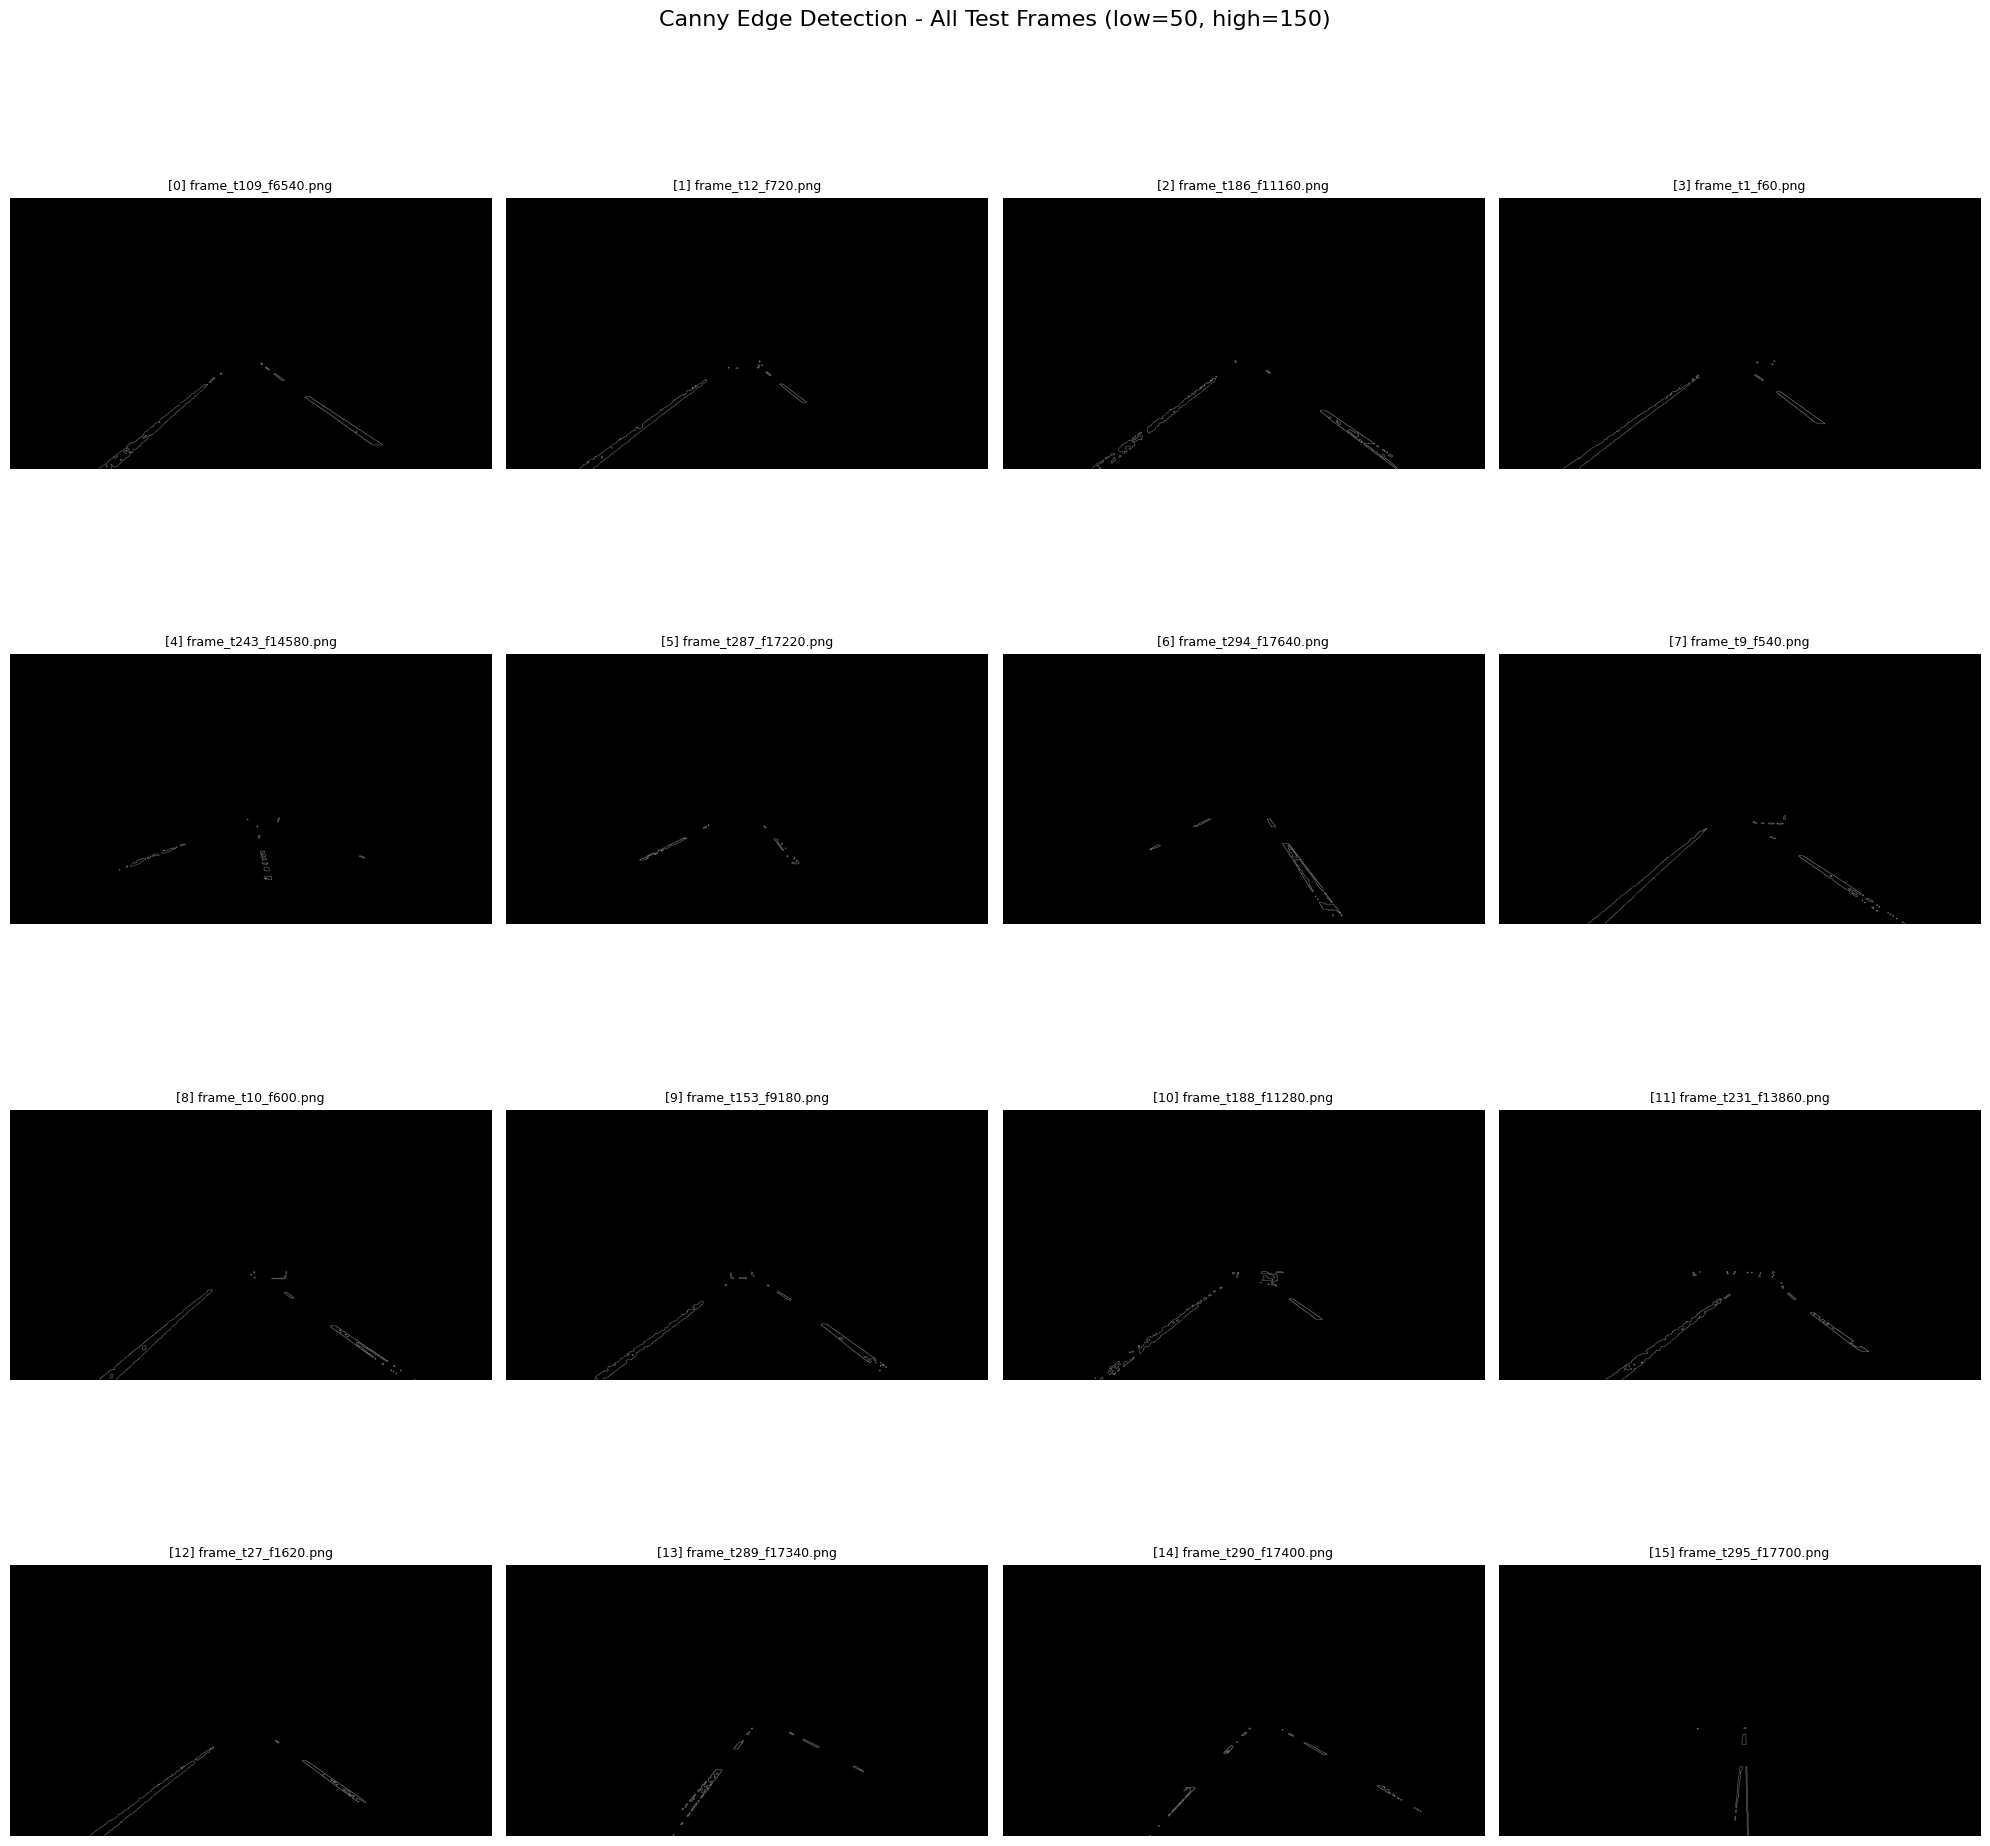

✓ Processed 16 frames


In [19]:
# Load test frames (same as in previous notebooks)
ROI_FRAME_NAMES = [
    "frame_t109_f6540.png",   # [2]
    "frame_t12_f720.png",     # [5]
    "frame_t186_f11160.png",  # [9]
    "frame_t1_f60.png",       # [12]
    "frame_t243_f14580.png",  # [18]
    "frame_t287_f17220.png",  # [23]
    "frame_t294_f17640.png",  # [29]
    "frame_t9_f540.png"       # [35]
]

CANNY_FRAME_NAMES = [
    "frame_t10_f600.png",     # [3]
    "frame_t153_f9180.png",   # [7]
    "frame_t188_f11280.png",  # [11]
    "frame_t231_f13860.png",  # [14]
    "frame_t27_f1620.png",    # [20]
    "frame_t289_f17340.png",  # [25]
    "frame_t290_f17400.png",  # [27]
    "frame_t295_f17700.png"   # [30]
]

ALL_TEST_FRAMES = ROI_FRAME_NAMES + CANNY_FRAME_NAMES

# Process all frames
rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()

for idx, name in enumerate(ALL_TEST_FRAMES):
    frame_path = os.path.join(frames_dir, name)
    frame = cv2.imread(frame_path)
    
    if frame is None:
        axes[idx].text(0.5, 0.5, f"File not found:\n{name}", 
                      ha='center', va='center', fontsize=8, color='red')
        axes[idx].set_title(f"[{idx}] {name}", fontsize=9)
        axes[idx].axis("off")
        continue
    
    # Apply pipeline: ROI → Color Threshold → Canny
    frame_roi, _ = apply_roi_mask(frame)
    mask = apply_color_threshold(frame_roi)
    edges = apply_canny(mask, low_threshold, high_threshold)
    
    # Display edges
    axes[idx].imshow(edges, cmap="gray")
    axes[idx].set_title(f"[{idx}] {name}", fontsize=9)
    axes[idx].axis("off")

plt.suptitle(f"Canny Edge Detection - All Test Frames (low={low_threshold}, high={high_threshold})", 
             fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

print(f"✓ Processed {len(ALL_TEST_FRAMES)} frames")